In [45]:
%pylab inline
from halo import *
from octopus import density
from matplotlib import ticker

Populating the interactive namespace from numpy and matplotlib


In [56]:
font = {'size':18, 'family':'serif'}
plt.matplotlib.rc('font', **font)

In [7]:
MWLMC_pos = readsnap('../../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_119', 'pos', 'dm')  
MWLMC_vel = readsnap('../../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_119', 'vel', 'dm')
MWLMC_pot = readsnap('../../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_119', 'pot', 'dm')
MWLMC_ids = readsnap('../../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_119', 'pid', 'dm')
MWLMC_M = readsnap('../../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_119', 'mass', 'dm')  

In [9]:
MW_pos, MW_vel, LMC_pos, LMC_vel, pot_MW, potLMC, M_mw, M_lmc = host_sat_particles(MWLMC_pos, MWLMC_vel, MWLMC_ids, 1000000, MWLMC_pot, MWLMC_M)

In [10]:
MWLMC_pos_t, MWLMC_vel_t, MWLMC_M_t, MWLMC_pot_t = truncate(MWLMC_pos, MWLMC_vel, 500, MWLMC_M, MWLMC_pot)
MW_pos_t, MW_vel_t, MW_M_t, MW_pot_t = truncate(MW_pos, MW_vel, 500, M_mw, pot_MW)

In [26]:
def pot_scatter(potential, posx, posy, title, xmin=False, xmax=False, ymin=False, ymax=False):
    N_cuts = 14
    colors = np.r_[np.linspace(0.1, 1, N_cuts), np.linspace(0.1, 1, N_cuts)]
    cm = plt.get_cmap('Greys')
    my_colors = cm(colors)
    pot_cuts_all_nb = np.logspace(np.log10(min(np.abs(potential))), np.log10(max(np.abs(potential))), N_cuts)
    figure(figsize=(5,5))
    for i in range(1,N_cuts):
        index_c = np.where((((np.abs(potential)))<pot_cuts_all_nb[i]) & 
                           (((np.abs(potential)))>pot_cuts_all_nb[i-1]))[0]
        plt.title(title, fontsize=30)
        #print(len(index_c))
        plt.scatter(posx[index_c], posy[index_c], 
                    c=my_colors[i], edgecolors='none', s=15)
        

    xlabel('$Y[kpc]$', fontsize=25)
    ylabel('$Z[kpc]$', fontsize=25)
    if xmin:
        xlim(xmin, xmax)
        ylim(ymin, ymax)

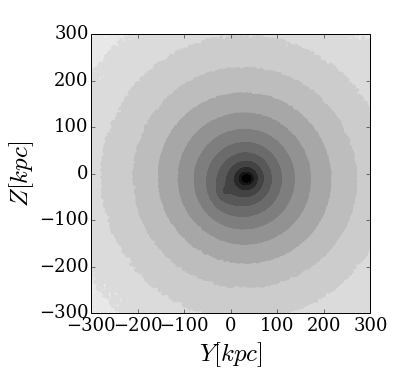

In [33]:
pot_scatter(MWLMC_pot_t, MWLMC_pos_t[:,1], MWLMC_pos_t[:,2], '$\mathrm{}$', xmin=-300, xmax=300, ymin=-300, ymax=300)


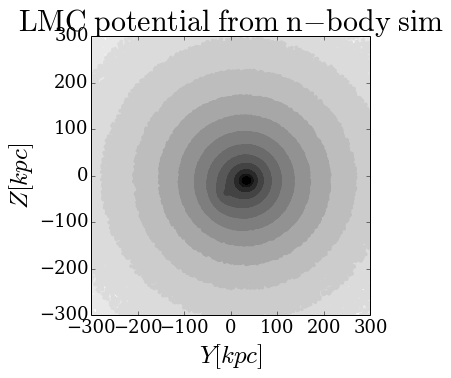

In [28]:
pot_scatter(MW_pot_t, MW_pos_t[:,1], MW_pos_t[:,2], '$\mathrm{LMC\ potential\ from\ n-body\ sim}$', xmin=-300, xmax=300, ymin=-300, ymax=300)


In [152]:
lmc_orbit = np.loadtxt('../LMC_orbit/orbits/LMC6_H1.txt')
xcm_LMC = lmc_orbit[:,2]
ycm_LMC = lmc_orbit[:,3]
zcm_LMC = lmc_orbit[:,4]

In [32]:
%time rho_MW = density.grid(MW_pos_t[:,1], MW_pos_t[:,2], MW_pos_t[:,0], 200)

CPU times: user 6h 17s, sys: 2 s, total: 6h 19s
Wall time: 6h 3s


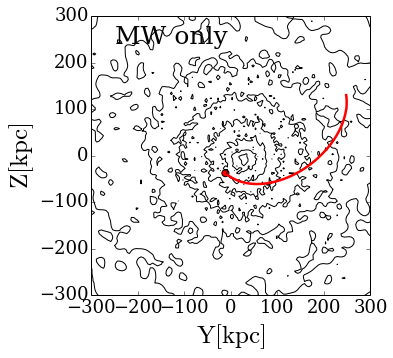

In [195]:
figure(figsize=(5,5))
percs = np.log10([rho_MW.min(), rho_MW.max()])
levels = np.logspace(-5, (percs[1]), 10)
text(-250, 240, 'MW only', color='k', fontsize=25)
contour(np.linspace(-500, 500, 200), np.linspace(-500, 500, 200), (rho_MW.T), colors='k', lw=2, locator=ticker.LogLocator(), levels=levels, 
        origin = 'lower')

plot(ycm_LMC[:119], zcm_LMC[:119], lw=2.5, c='r')
scatter(ycm_LMC[119], zcm_LMC[119], s=50, c='r')

xlabel('$\mathrm{Y[kpc]}$', fontsize=25)
ylabel('$\mathrm{Z[kpc]}$', fontsize=25)
xlim(-300, 300)
ylim(-300, 300)

savefig('MW_dens_contour.png', bbox_inches='tight')

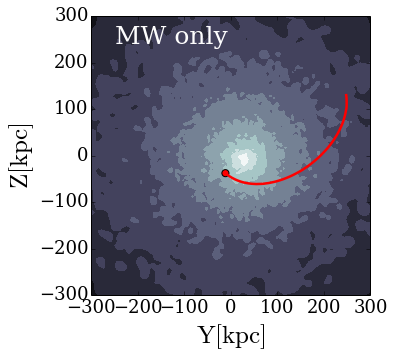

In [183]:
figure(figsize=(5,5))
percs = np.log10([rho_MW.min(), rho_MW.max()])
levels = np.logspace(-5, (percs[1]), 10)
text(-250, 240, 'MW only', color='white', fontsize=25)
contourf(np.linspace(-500, 500, 200), np.linspace(-500, 500, 200), (rho_MW.T), cmap='bone', lw=2, locator=ticker.LogLocator(), levels=levels, 
        origin = 'lower')

plot(ycm_LMC[:119], zcm_LMC[:119], lw=2.5, c='r')
scatter(ycm_LMC[119], zcm_LMC[119], s=50, c='r')

xlabel('$\mathrm{Y[kpc]}$', fontsize=25)
ylabel('$\mathrm{Z[kpc]}$', fontsize=25)
xlim(-300, 300)
ylim(-300, 300)

savefig('MW_dens_contourf.png', bbox_inches='tight')

In [138]:
%time rho_MWLMC = density.grid(MWLMC_pos_t[:,1], MWLMC_pos_t[:,2], MWLMC_pos_t[:,0], 200)

CPU times: user 9h 56min 43s, sys: 15.1 s, total: 9h 56min 58s
Wall time: 9h 59min 8s


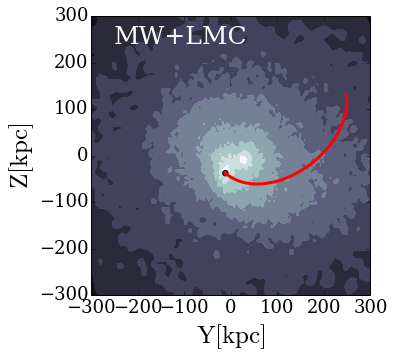

In [192]:
figure(figsize=(5,5))
percs = np.log10([rho_MWLMC.min(), rho_MWLMC.max()])
levels = np.logspace(-5, (percs[1]), 10)
text(-250, 240, 'MW+LMC', color='white', fontsize=25)
contourf(np.linspace(-500, 500, 200), np.linspace(-500, 500, 200), (rho_MWLMC.T), cmap='bone', locator=ticker.LogLocator(), levels=levels, origin='lower')
plot(ycm_LMC[:119], zcm_LMC[:119], lw=3.0, c='r')
scatter(ycm_LMC[119], zcm_LMC[119], s=30, c='r')
xlabel('$\mathrm{Y[kpc]}$', fontsize=25)
ylabel('$\mathrm{Z[kpc]}$', fontsize=25)
xlim(-300, 300)
ylim(-300, 300)

savefig('MWLMC_dens_contourf.png', bbox_inches='tight')

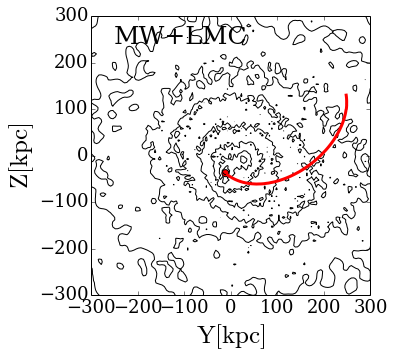

In [197]:
figure(figsize=(5,5))
percs = np.log10([rho_MWLMC.min(), rho_MWLMC.max()])
levels = np.logspace(-5, (percs[1]), 10)
text(-250, 240, 'MW+LMC', color='k', fontsize=25)
contour(np.linspace(-500, 500, 200), np.linspace(-500, 500, 200), (rho_MWLMC.T), lw=2, colors='k', locator=ticker.LogLocator(), levels=levels, origin='lower')
plot(ycm_LMC[:119], zcm_LMC[:119], lw=3.0, c='r')
scatter(ycm_LMC[119], zcm_LMC[119], s=50, c='r')
xlabel('$\mathrm{Y[kpc]}$', fontsize=25)
ylabel('$\mathrm{Z[kpc]}$', fontsize=25)
xlim(-300, 300)
ylim(-300, 300)

savefig('MWLMC_dens_contour.png', bbox_inches='tight')

In [98]:
min(MW_pos_t[:,1])
#max(MW_pos_t[:,2])

-498.16037